# Table of contents
## Comparing profiles to regions
## Final visualizations and other comparisons/analysis from demographics

# comparing profiles and regions

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
path = r'C:\Users\Admin\Documents\Dec 22 Instacart Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_active_profiles.pkl'))

In [4]:
pd.options.display.max_columns = None

In [30]:
df.head(5)

In [32]:
#trying to pare some of the data down so my computer will stop having so many memory errors
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column] = df[column].astype('int32')

In [33]:
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = df[column].astype('float32')

In [5]:
#we already have the huge data set saved; gonna delete columns not needed for this question
df = df.drop(columns = ['gender', 'state', 'date_joined', 'n_dependents', 'add_to_cart_order', 'aisle_id', 'active_flag'])

In [34]:
df.head(5)

In [6]:
#I had so many memory issues I don't think this got applied when I saved the pkl in 4.10b, so just going to run it again. I'll set the max to 600 this time though
df = df[df['order_cost'] < 600]

In [36]:
#now we can make a column that combines profile type and region. We only have 4 regions and 5 profile types, so we can visually compare 20 different categories. If it was like 100 categories we'd have to do something different
def areas(row):
   return df['region'] + df['customer_profile']

In [37]:
df['customer_type'] = df.apply(areas, axis=1)

In [ ]:
#I've tried to get this to run so many times and it just won't work, it causes a memory error every dang time
#we're just gonna break off different profile groups and aggregate the data. we only have 5 profile types so it won't be too much of a hassle, but in a real world setting we'd have a more efficient way to do this
df_wf = df[df['customer_profile'] == 'Wealthy family']

In [ ]:
df_wf.groupby('region').agg({'order_cost': ['mean']})

In [ ]:
df_wf.groupby('region').agg({'order_frequency': ['mean']})

In [41]:
pd.options.display.max_rows = None

In [ ]:
df_wf.groupby('region').department_id.value_counts()

In [ ]:
df_wf.groupby('region').frequency_flag.value_counts()

In [ ]:
df_wf.groupby('region').agg({'avg_spent_per_item': ['mean']})

no differences are found by region in wealthy families in order cost, frequency, or departments shopped in. Bit of a disparity in the amount spent per item, but before you can really get info from that, you have to adjust for price differences around the country (looking at you, California). 

In [ ]:
df_wf.groupby('region').marital_status.value_counts()

so all users in wealthy families are either married or still living at home. interesting!

In [46]:
#cleared all outputs from the wealthy family subset to free up memory, let's look at the next group
df_sc = df[df['customer_profile'] == 'Senior citizen']

In [ ]:
df_sc.groupby('region').agg({'order_cost': ['mean']})

In [ ]:
df_sc.groupby('region').agg({'order_frequency': ['mean']})

In [ ]:
df_sc.groupby('region').frequency_flag.value_counts()

In [ ]:
df_sc.groupby('region').department_id.value_counts()

In [ ]:
df_sc.groupby('region').agg({'avg_spent_per_item': ['mean']})

so the senior citizens category doesn't seem to differ much by region either. Hell they don't seem to differ from the wealthy family category in anything besides average spent per item.

In [55]:
#cleared all senior citizen outputs
df_lif = df[df['customer_profile'] == 'Low income family']

In [ ]:
df_lif.groupby('region').agg({'order_cost': ['mean']})

In [ ]:
df_lif.groupby('region').agg({'order_frequency': ['mean']})

In [ ]:
df_lif.groupby('region').frequency_flag.value_counts()

In [ ]:
df_lif.groupby('region').department_id.value_counts()

In [ ]:
df_lif.groupby('region').agg({'avg_spent_per_item': ['mean']})

so yet again, we're seeing no significant differences between regions, this time, not even when it comes to average spent per item. The only disparity we've managed to tease out so far is that wealthy families tend to spend a lot per item, senior citizens a moderate amount, and low income families the lowest amount. Based on everything we've seen so far, I'm inclined to tell the marketing team that region does not matter and departments shopped in look the same for pretty much everyone. If I had to make a recommendation, I'd say making arbitrary profiles, even if they're reasonable guesses like wealthy families having x criteria, isn't going to lead us to good results. We went top down when maybe we should have gone bottom up and looked at each piece separately -- how # of dependents affects things, how age affects things, how income affects things, etc. -- then gone from there. Based on what we have now, though, I think the best thing the marketing team can do is push pricey items to wealthy families (treat yourself!), lower cost items to low income families (big savings! bargain deals!), and so on. 

# final visualizations

In [ ]:
bar = df.groupby('customer_profile').agg({'avg_spent_per_item': ['mean']}).plot.bar()

In [50]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_demographic_avg_item.png'))

I'd like the formatting to be a bit better, but you can see the differences in average spent per item based on what profile the customer falls into. I think that's useful information!

In [ ]:
df['department_id'].value_counts().plot.bar()

In [ ]:
df_wf['department_id'].value_counts().plot.bar()

In [ ]:
df_lif['department_id'].value_counts().plot.bar()

I wish we had a way to stack these charts on top of each other (I miss Tableau), but from a glance you can see how the profiles don't really affect department ID frequency. There's a few differences here and there, but in the grand scheme of things these charts all look pretty similar.  

In [ ]:
bar = df.groupby('region').agg({'order_cost': ['mean']}).plot.bar()

In [28]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_cost.png'))

And one more just to show how region doesn't impact what people are spending. We could theoretically make these charts for every single variable, like frequency or avg per item (and if we could stack charts we could more visually see department ID counts,but if you try it here it looks like a mess), but as is you can get the gist.  

In [ ]:
bar = df.groupby('region').agg({'avg_spent_per_item': ['mean']}).plot.bar()

In [30]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_item.png'))

In [23]:
#I bet we can find where the most loyal customers live though. We start by making a subset with only loyal customers
dfl = df[df['loyalty_flag'] == 'Loyal customer']

In [28]:
#Now we show only user ID and region
dflr = dfl[['user_id', 'region', 'generation']]

In [29]:
#Removing the duplicates gives us a list of individual users and what regions they live in
dflr = dfl.drop_duplicates()

In [ ]:
bar = dflr['region'].value_counts().plot.bar()

Most of our loyal customers live in the south!

In [20]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag_region.png'))

In [9]:
#We already saw that the profiles we made didn't affect departments shopped in, so let's try to break it down a bit more. we can try age first
#we should start with a for loop that breaks it down by generation. It'll make things way easier
result = []

for value in df['age']:
  if value >= 18 and value < 27:
    result.append("GenZ")
  elif value >= 27 and value < 46:
    result.append("Millenial")
  elif value >= 46 and value < 58:
    result.append("GenX")
  else:
    result.append("Boomer")

In [10]:
df['generation'] = result

In [40]:
df['generation'].value_counts()

Boomer       11504306
Millenial     9187503
GenX          5846714
GenZ          4342444
Name: generation, dtype: int64

In [ ]:
bar = df.groupby('generation').agg({'max_order': ['mean']}).plot.bar()

I tried a lot of values and can't seem to find a difference based on ages

In [9]:
#let's get a list of all orders, then find age vs order cost
#we start by returning only the columns we want to use
df2 = df[['order_id', 'order_cost', 'age']]

In [10]:
#then we remove duplicates so we have each order ID listed only once. It's more accurate to look at the metrics for one order vs looking at each individual item in that order.
df2 = df2.drop_duplicates()

In [ ]:
plot = sns.scatterplot(x = 'age', y = 'order_cost',data = df2)

This is not a very helpful chart lol

But I bet we can narrow it down to the most expensive orders, we might see a correlation there

In [12]:
df2 = df2[df2['order_cost'] >= 450]

In [ ]:
#I looked up how to add a trendline
plot = sns.regplot(x = "age",
            y = "order_cost", 
            ci = None,
            data = df2)

In [15]:
plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_order_cost.png'))

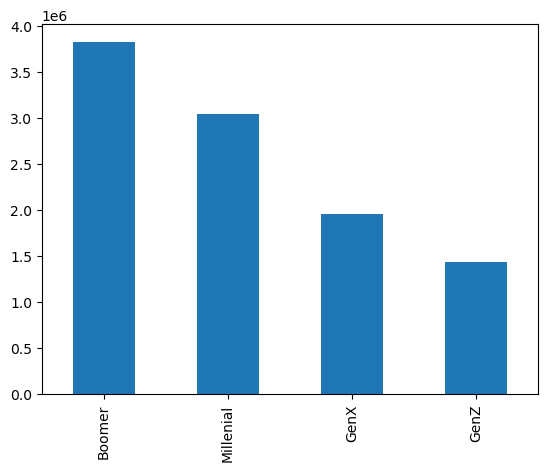

In [30]:
#reran making the loyalty customers only subset so it includes the generations
bar = dflr['generation'].value_counts().plot.bar()

In [31]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_loyalty.png'))

In [ ]:
#The next few rows split the data into older and younger generations and compared their departments most often shopped in
dfo = df[df['age'] > 45]

In [ ]:
bar = dfo['department_id'].value_counts().plot.bar()

In [40]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_boomer_genx.png'))

In [ ]:
dfy = df[df['age'] < 46]

In [ ]:
bar = dfy['department_id'].value_counts().plot.bar()

In [43]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_millenial_genz.png'))

In [11]:
dfr = df[df['reordered'] == 1]

In [13]:
dfr['generation'].value_counts()

Boomer       6985910
Millenial    5589685
GenX         3550567
GenZ         2641520
Name: generation, dtype: int64